In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [3]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [4]:
def give_labels_to_genders(gen):
    if gen=='Male':
        return 1
    elif gen=='Female':
        return 0
def give_names_to_indices(ind):
    if ind==0:
        return 'Extremely Weak'
    elif ind==1:
        return 'Weak'
    elif ind==2:
        return 'Normal'
    elif ind==3:
        return 'OverWeight'
    elif ind==4:
        return 'Obesity'
    elif ind==5:
        return 'Extremely Obese'

In [5]:
data['Gender'] = data['Gender'].apply(give_labels_to_genders)
data['Index'] = data['Index'].apply(give_names_to_indices)

In [6]:
data

,Gender,Height,Weight,Index
0,1,174,96,Obesity
1,1,189,87,Normal
2,0,185,110,Obesity
3,0,195,104,OverWeight
4,1,149,61,OverWeight
...,...,...,...,...
495,0,150,153,Extremely Obese
496,0,184,121,Obesity
497,0,141,136,Extremely Obese
498,1,150,95,Extremely Obese


C:\Users\sharma ji\AppData\Roaming\Python\Python37\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


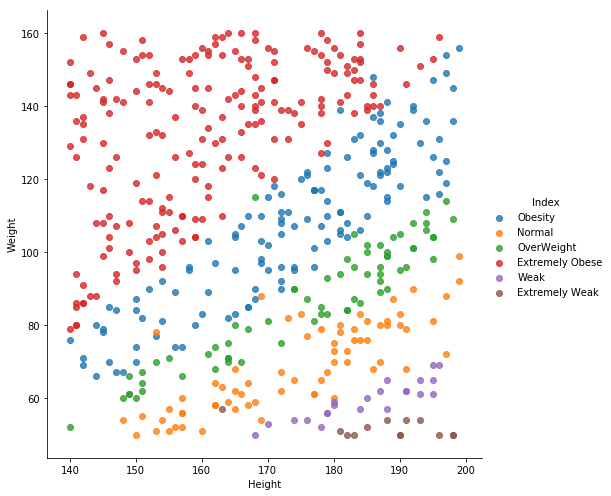

In [7]:
sns.lmplot('Height','Weight',data,hue='Index',size=7,aspect=1,fit_reg=False)

In [8]:
people = data['Gender'].value_counts()

In [9]:
categories = data['Index'].value_counts()
categories

Extremely Obese    198
Obesity            130
Normal              69
OverWeight          68
Weak                22
Extremely Weak      13
Name: Index, dtype: int64

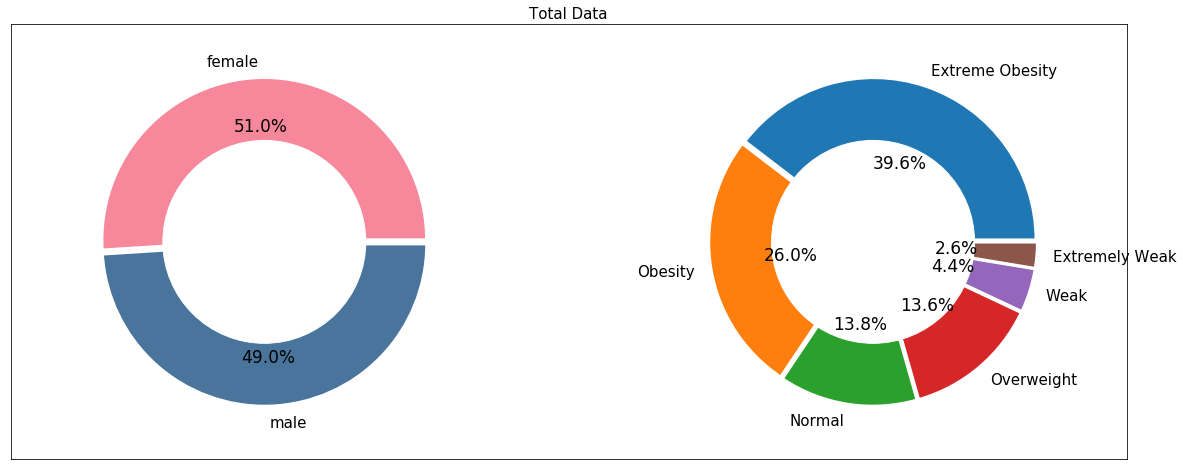

In [10]:
fig = plt.figure(figsize=(20,8))
plt.title("Total Data",loc='center',weight=10,size=15)
plt.xticks([]) # to disable xticks
plt.yticks([]) # to disable yticks

# first pie-plot
ax1 = fig.add_subplot(121)
ax1.axis('equal')
explode = (0.01,)*(len(people))

wedges, texts, autotexts =  ax1.pie(people,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['female','male'],
                                    colors=['#f7879a','#49759c'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.7,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts,size=17)
plt.setp(texts,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes

# Second pie-plot
ax2 = fig.add_subplot(122)
ax2.axis('equal')
explode = (0.01,)*(len(categories))
wedges2, texts2, autotexts2 =  ax2.pie(categories,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Extreme Obesity','Obesity','Normal','Overweight','Weak','Extremely Weak'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.5,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts2,size=17)
plt.setp(texts2,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes

In [11]:
# STATS FOR MEN
data[data['Gender']==1]['Index'].value_counts()

Extremely Obese    105
Obesity             59
OverWeight          32
Normal              28
Weak                15
Extremely Weak       6
Name: Index, dtype: int64

In [12]:
# STATS FOR WOMEN
data[data['Gender']==0]['Index'].value_counts()

Extremely Obese    93
Obesity            71
Normal             41
OverWeight         36
Weak                7
Extremely Weak      7
Name: Index, dtype: int64

In [13]:
data = pd.DataFrame(data)
data.head()

,Gender,Height,Weight,Index
0,1,174,96,Obesity
1,1,189,87,Normal
2,0,185,110,Obesity
3,0,195,104,OverWeight
4,1,149,61,OverWeight


In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
y=data['Index']
data =data.drop(['Index'],axis=1)
ohe = OneHotEncoder(categorical_features=[0])
data = ohe.fit_transform(data).toarray()

C:\Users\sharma ji\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\sharma ji\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [15]:
data = pd.DataFrame(data)
data.head()

,0,1,2,3
0,0.0,1.0,174.0,96.0
1,0.0,1.0,189.0,87.0
2,1.0,0.0,185.0,110.0
3,1.0,0.0,195.0,104.0
4,0.0,1.0,149.0,61.0


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)
data=pd.DataFrame(data)
data

,0,1,2,3
0,-1.020204,1.020204,0.247939,-0.309117
1,-1.020204,1.020204,1.164872,-0.587322
2,0.980196,-0.980196,0.920357,0.123647
3,0.980196,-0.980196,1.531645,-0.061823
4,-1.020204,1.020204,-1.280283,-1.391027
...,...,...,...,...
495,0.980196,-0.980196,-1.219155,1.452850
496,0.980196,-0.980196,0.859228,0.463676
497,0.980196,-0.980196,-1.769315,0.927351
498,-1.020204,1.020204,-1.219155,-0.340029


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=101)

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf= RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
pred = rf.predict(X_test)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print('Acuuracy is --> ',accuracy_score(y_test,pred)*100)
print('\n')

                 precision    recall  f1-score   support

Extremely Obese       0.92      0.97      0.95        63
 Extremely Weak       1.00      1.00      1.00         1
         Normal       0.92      0.96      0.94        23
        Obesity       0.78      0.84      0.81        38
     OverWeight       0.92      0.58      0.71        19
           Weak       0.83      0.83      0.83         6

       accuracy                           0.88       150
      macro avg       0.90      0.86      0.87       150
   weighted avg       0.88      0.88      0.88       150



[[61  0  0  2  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0 22  0  0  1]
 [ 5  0  0 32  1  0]
 [ 0  0  1  7 11  0]
 [ 0  0  1  0  0  5]]


Acuuracy is -->  88.0




In [22]:
#finding appropriate no of estimators
accu = []
for i in [100,200,400,500,700,800,1000]:
    rf= RandomForestClassifier(n_estimators=i)
    rf.fit(X_train,y_train)
    pred = rf.predict(X_test)
    acc = (accuracy_score(y_test,pred)*100)
    accu.append(round(acc,2))
    print('accuracy for {} estimators is {}% '.format(i,acc))



accuracy for 100 estimators is 86.0% 
accuracy for 200 estimators is 88.0% 
accuracy for 400 estimators is 87.33333333333333% 
accuracy for 500 estimators is 86.66666666666667% 
accuracy for 700 estimators is 87.33333333333333% 
accuracy for 800 estimators is 88.0% 
accuracy for 1000 estimators is 87.33333333333333% 


In [23]:
tree_vs_acc = pd.DataFrame()
tree_vs_acc['No. of trees in Forest'] = [100,200,400,500,700,800,1000]
tree_vs_acc['Accuracy scores for Random Forest Classification'] = accu
tree_vs_acc

,No. of trees in Forest,Accuracy scores for Random Forest Classification
0,100,86.00
1,200,88.00
2,400,87.33
3,500,86.67
4,700,87.33
5,800,88.00
6,1000,87.33


,No. of trees in Forest,Accuracy scores for Random Forest Classification
0,100,86.00
1,200,88.00
2,400,87.33
3,500,86.67
4,700,87.33
5,800,88.00
6,1000,87.33


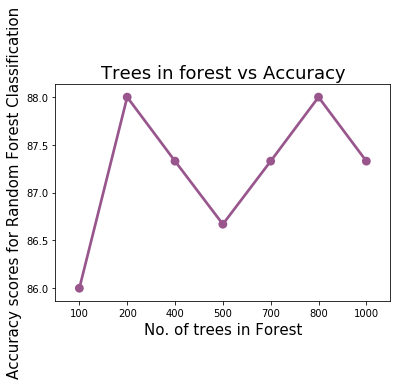

In [24]:
sns.pointplot(x='No. of trees in Forest',y='Accuracy scores for Random Forest Classification',data=tree_vs_acc,color='#98568d')

plt.title('Trees in forest vs Accuracy',size=18)
plt.xlabel('No. of trees in Forest',size=15)
plt.ylabel('Accuracy scores for Random Forest Classification',size=15)


tree_vs_acc

In [37]:
def lp(details):
    gender = details[0]
    height = details[1]
    weight = details[2]
    
    if gender=='Male':
        details=np.array([[0.0,1.0,np.float(height),np.float(weight)]])
    elif gender=='Female':
        details=np.array([[1.0,0.0,np.float(height),np.float(weight)]])
    
    df = pd.DataFrame(details)
    df.iloc[:,:] = scaler.transform(df.iloc[:,:])
#     print(df)
    y_pred = rf.predict(df)
    return (y_pred[0])
    

In [46]:
#Live predictor

your_details = ['Male',175,80]
print(lp(your_details))

Normal
